# Mini Project 1

About Dataset
Context
US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

Content
This dataset includes 12 features:
Feature	Type	Description
Price	Integer	The sale price of the vehicle in the ad
Years	Integer	The vehicle registration year
Brand	String	The brand of car
Model	String	model of the vehicle
Color	String	Color of the vehicle
State/City	String	The location in which the car is being available for purchase
Mileage	Float	miles traveled by vehicle
Vin	String	The vehicle identification number is a collection of 17 characters (digits and capital letters)
Title Status	String	This feature included binary classification, which are clean title vehicles and salvage insurance
Lot	Integer	A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
Condition	String	Time

## Business Question ideas:

- How does the mileage of a car relate to its price?
- How does the car brand effect its price?


In [36]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data Collecting - Raw Data

In [37]:
df = pd.read_csv('C:/Users/tina_/OneDrive/Documents/Data Science & AI/iod/Mini Project 1/data/USA_cars_datasets.csv')

In [38]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [39]:
df.tail()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Drop some unwanted columns

In [41]:
drop_columns = ['Unnamed: 0', 'condition', 'vin', 'lot']
df = df.drop(drop_columns, axis = 1)
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [42]:
df.shape

(2499, 9)

In [43]:
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
dtype: int64

In [ ]:
# no cells are blank which is good

In [44]:
df.min()

price                       0
brand                   acura
model                    1500
year                     1973
title_status    clean vehicle
mileage                   0.0
color                   beige
state                 alabama
country                canada
dtype: object

In [45]:
df.loc[df['price'] < 500].head()

,price,brand,model,year,title_status,mileage,color,state,country
141,0,dodge,van,2008,salvage insurance,177948.0,orange,utah,usa
144,0,dodge,door,2014,salvage insurance,123660.0,silver,utah,usa
188,175,chrysler,door,2000,salvage insurance,231240.0,red,north carolina,usa
196,0,ford,mpv,2017,clean vehicle,76858.0,white,texas,usa
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,kentucky,usa


In [46]:
df = df.drop(df.loc[df['price'] == df['price'].min()].index)

In [47]:
df.min()

price                      25
brand                   acura
model                    1500
year                     1973
title_status    clean vehicle
mileage                   0.0
color                   beige
state                 alabama
country                canada
dtype: object

In [48]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [49]:
df.price.value_counts().head(10)

price
16500    26
13900    21
15500    19
15000    19
22500    18
25       18
8000     18
25000    18
18500    17
9200     16
Name: count, dtype: int64

In [50]:
df['color'].value_counts()

color
white                                      702
black                                      510
gray                                       389
silver                                     296
red                                        187
blue                                       147
no_color                                    61
orange                                      18
charcoal                                    18
green                                       18
gold                                        17
brown                                       15
yellow                                       8
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
billet silver metallic clearcoat             3
triple yellow tri-coat                       3
super b

In [51]:
list_main_colors = list(df['color'].value_counts().index)[:12]
df = df[df['color'].isin(list_main_colors)]
# df.head()
df['color'].value_counts()

color
white       702
black       510
gray        389
silver      296
red         187
blue        147
no_color     61
orange       18
charcoal     18
green        18
gold         17
brown        15
Name: count, dtype: int64

In [52]:
df.describe()

,price,year,mileage
count,2378.000000,2378.000000,2378.000000
mean,19101.253154,2016.981497,49677.273759
std,12016.306256,2.962618,51008.173272
min,25.000000,1973.000000,0.000000
25%,10500.000000,2016.000000,21318.250000
50%,17000.000000,2018.000000,35022.000000
75%,25800.000000,2019.000000,59910.250000
max,84900.000000,2020.000000,999999.000000


In [53]:
df.price.value_counts()

price
16500    26
13900    21
15000    19
15500    19
22500    18
         ..
31003     1
4480      1
3040      1
3550      1
30100     1
Name: count, Length: 737, dtype: int64

In [54]:
df.price.max()

84900

In [55]:
df.price.min()

25

In [56]:
df.brand

0          toyota
1            ford
2           dodge
3            ford
4       chevrolet
          ...    
2494       nissan
2495       nissan
2496       nissan
2497       nissan
2498       nissan
Name: brand, Length: 2378, dtype: object

In [57]:
df.shape

(2378, 9)

In [58]:
median=df.groupby('brand')['price'].median()
def fill_median(cols):
    price=cols[0]
    brand=cols[1]
    if price==0:
        return median[brand]
    else:
        return price

In [59]:
df['price']=df[['price','mileage']].apply(fill_median,axis=1)

C:\Users\tina_\AppData\Local\Temp\ipykernel_25736\1353404262.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Price of cars by mileage')

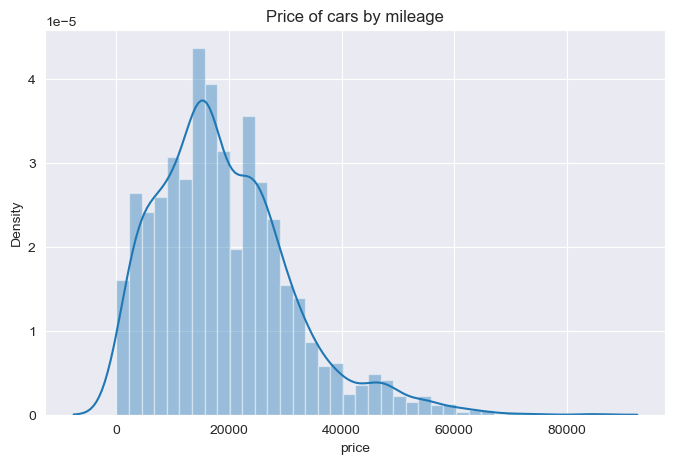

In [82]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.distplot(df['price'])
plt.title('Price of cars by mileage')

In [61]:
df[df['price']>60000]

,price,brand,model,year,title_status,mileage,color,state,country
277,67000.0,dodge,challenger,2019,clean vehicle,10944.0,blue,ohio,usa
399,61200.0,bmw,series,2020,clean vehicle,7509.0,black,california,usa
502,84900.0,mercedes-benz,sl-class,2017,clean vehicle,25302.0,silver,florida,usa
645,62000.0,chevrolet,corvette,2016,clean vehicle,19403.0,white,illinois,usa
667,63200.0,chevrolet,corvette,2016,clean vehicle,4266.0,red,california,usa
1215,65500.0,ford,srw,2019,clean vehicle,6500.0,black,indiana,usa
1331,65200.0,ford,max,2019,clean vehicle,18138.0,white,kentucky,usa
1334,63000.0,ford,srw,2019,clean vehicle,11640.0,no_color,illinois,usa
1336,70000.0,ford,drw,2019,clean vehicle,9643.0,no_color,illinois,usa
1340,74000.0,ford,drw,2019,clean vehicle,10536.0,no_color,illinois,usa


In [ ]:
# dodge, bmw, mercedes-benz, chevrolet and ford are the most expensive cars in this set.

Text(0.5, 1.0, 'Number of cars sold by brand')

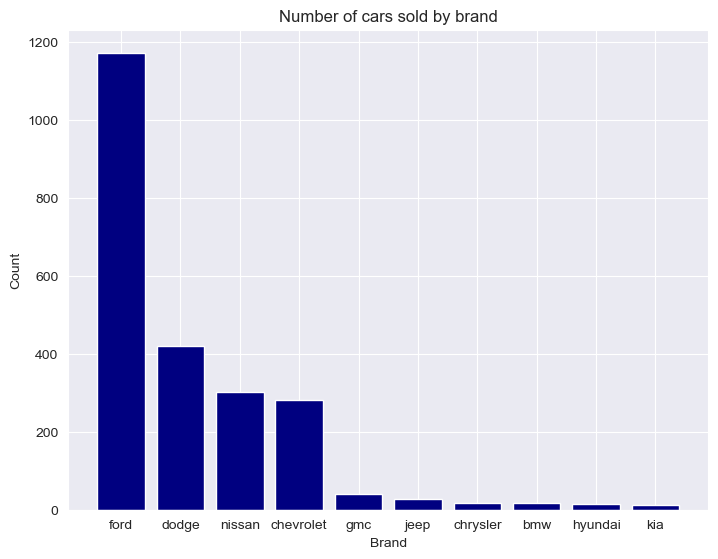

In [84]:
brands= df.groupby('brand')['model'].count().sort_values(ascending = False).head(10)
brands=brands.reset_index()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(brands['brand'],brands['model'],color='navy')
ax.set_xlabel('Brand')
ax.set_ylabel('Count')
plt.title('Number of cars sold by brand')

In [ ]:
# Most brands purchased are ford, dodge, nissan and chevrolet.

Text(0, 0.5, 'Count')

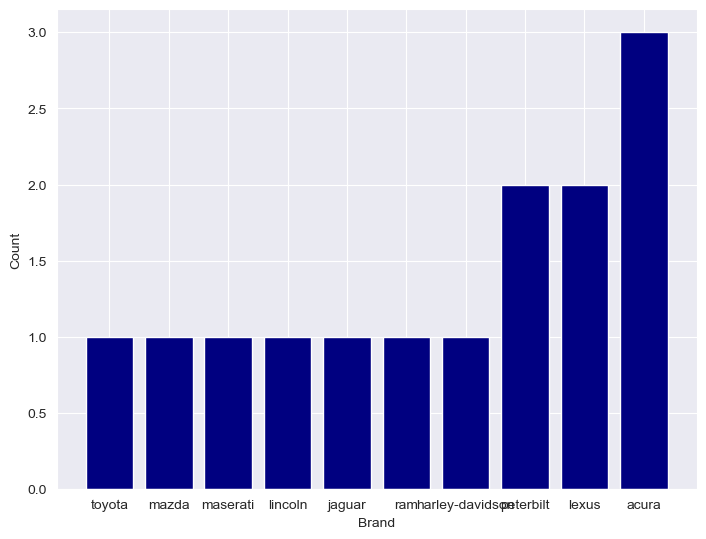

In [74]:
brands= df.groupby('brand')['model'].count().sort_values(ascending = True).head(10)
brands=brands.reset_index()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(brands['brand'],brands['model'],color='navy')
ax.set_xlabel('Brand')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

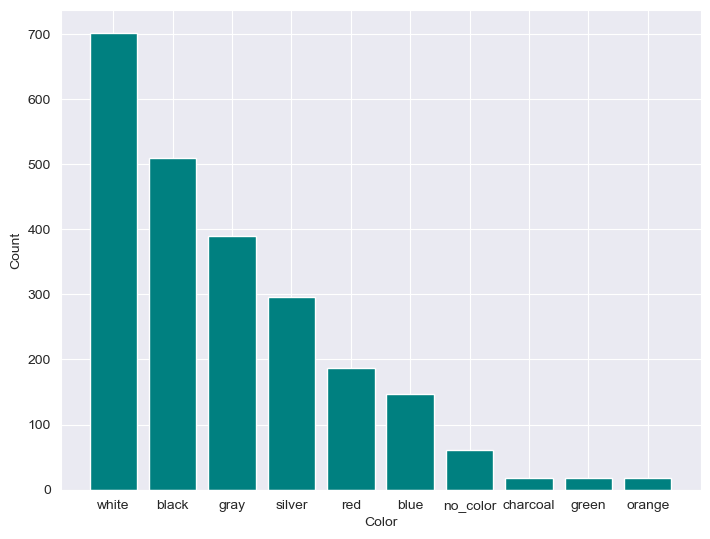

In [28]:
colors=df.groupby('color')['brand'].count().sort_values(ascending=False).head(10)
colors=colors.reset_index()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(colors['color'],colors['brand'],color='teal')
ax.set_xlabel('Color')
ax.set_ylabel('Count')


Text(0.5, 1.0, 'Number of cars sold by year')

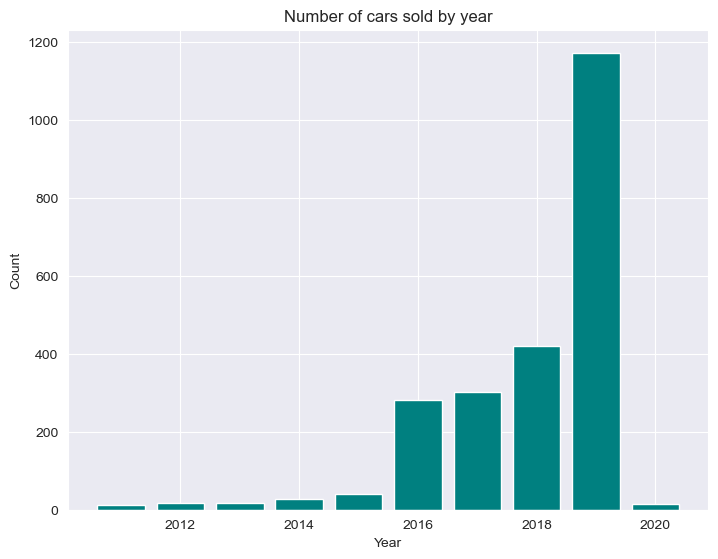

In [85]:
years= df.groupby('year')['model'].count().sort_values(ascending = False).head(10)
years=years.reset_index()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years['year'],brands['model'],color='teal')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.title('Number of cars sold by year')

Text(0.5, 1.0, 'Price of cars by mileage')

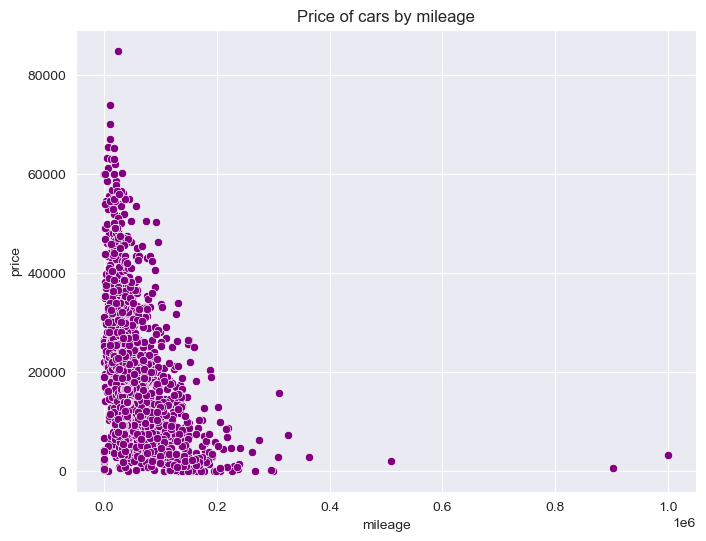

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mileage',y='price',data=df,color='purple')
plt.title('Price of cars by mileage')

D:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\tina_\AppData\Local\Temp\ipykernel_15484\607576180.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


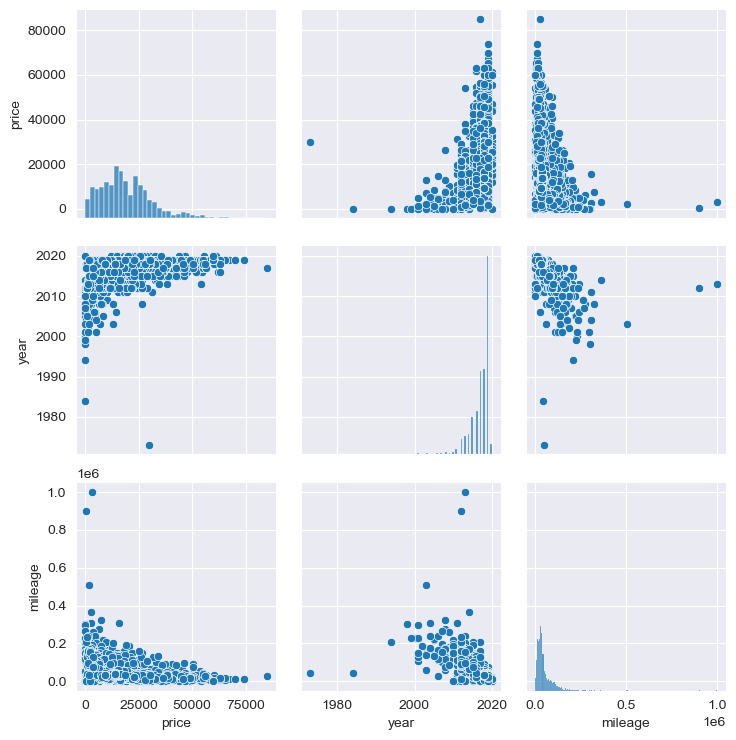

In [31]:
sns.pairplot(df[['price','year','mileage']])
plt.tight_layout()

In [32]:
CORREL('Price':A100, 'Mileage':B100)

SyntaxError: invalid syntax (4143808808.py, line 1)

In [45]:
df.price.mean()

18767.671468587436

In [46]:
df.mileage.mean()

52298.685474189675

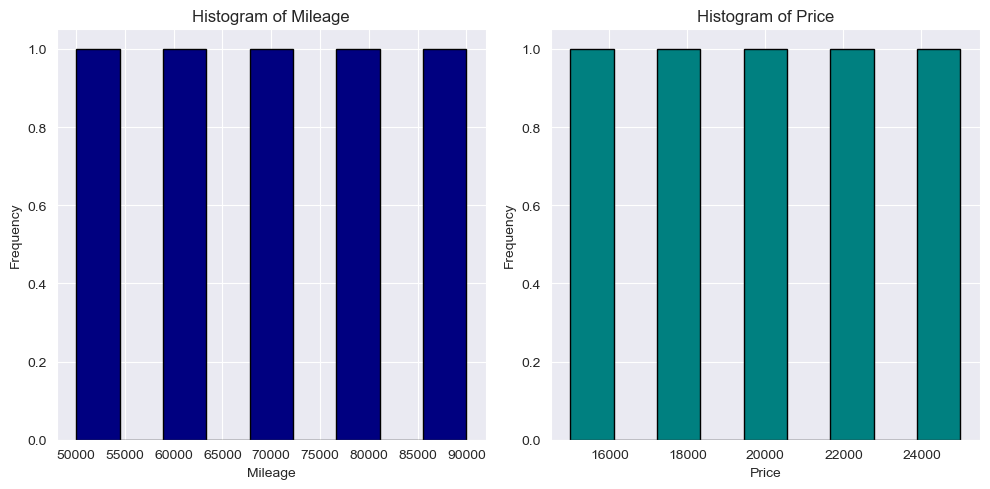

In [58]:
# Sample data for mileage and price
mileage = [50000, 60000, 70000, 80000, 90000]
price = [15000, 18000, 20000, 22000, 25000]

# Create a histogram for mileage
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(mileage, bins=9, color='navy', edgecolor='black')
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

# Create a histogram for price
plt.subplot(1, 2, 2)
plt.hist(price, bins=9, color='teal', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()


In [59]:
# Visualize the distribution of mileage and price
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

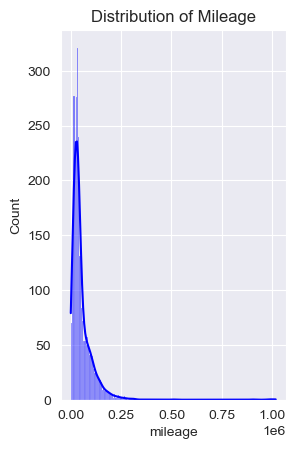

In [66]:
# Histogram for Mileage
plt.subplot(1, 2, 1)
sns.histplot(df['mileage'], kde=True, color='blue')
plt.title('Distribution of Mileage')
plt.savefig('histo_1.png')

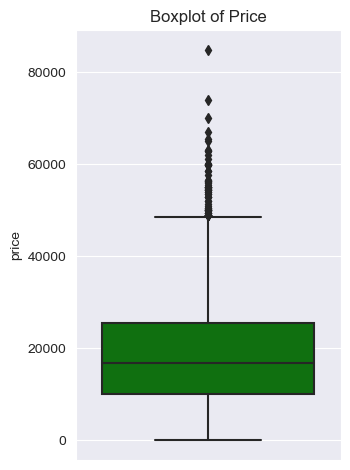

<Figure size 640x480 with 0 Axes>

In [69]:
# Boxplot for Price
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'], color='green')
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

plt.savefig('boxplot_1.png')

Text(0.5, 1.0, 'Mileage and Price')

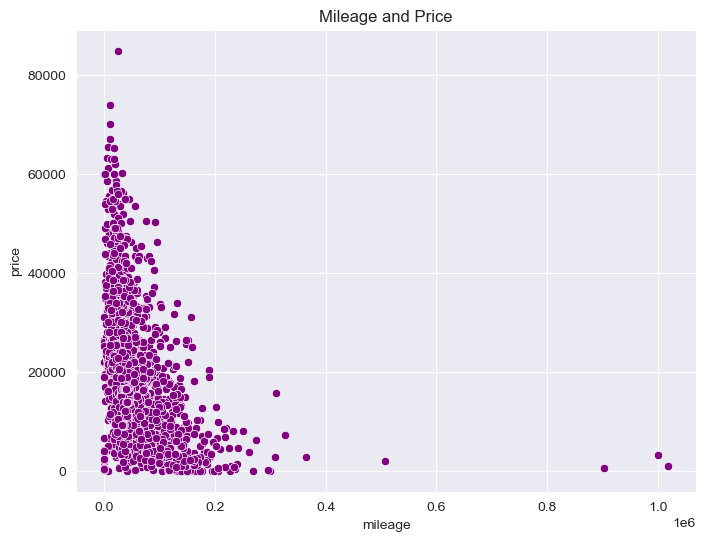

In [78]:
# Scatter plot to explore the relationship between Mileage and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', data=df, color='purple')
plt.title('Mileage and Price')

In [53]:
import numpy as np
from scipy.stats import ttest_ind

# Sample data for mileage and price
mileage = [50000, 60000, 70000, 80000, 90000]
price = [15000, 18000, 20000, 22000, 25000]

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(mileage, price)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between mileage and price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between mileage and price.")

T-statistic: 6.874516652539955
P-value: 0.00012777613047335913
Reject the null hypothesis: There is a significant difference between mileage and price.
